In [21]:
#Rouse model for a polymer in 3D

import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 100 # number of monomers
L = 10 # distance between monomers
k = 1 # spring constant
eps=1 # drag coefficient
dt=0.01 # time step
nsteps=500 # number of steps

def generate_positions(n, distance):

    positions = np.zeros((n, 3))  # Initialize positions array with zeros.
    positions[0] = [0, 0, 0]  # Set the first atom at the origin.

    # Generate positions of the remaining atoms.
    for i in range(1, n):
        # Generate a random unit vector with equiprobable directions.
        u = np.random.uniform(-1, 1, size=3)
        unit_vector = u / np.linalg.norm(u)

        # Calculate the position of the atom.
        position = positions[i-1] + distance * unit_vector
        positions[i] = position

    return positions


pos = generate_positions(N, L)

# Print positions to file
with open("init.xyz", "w") as f:
    f.write(str(N) + "\n")
    f.write("Rouse model\n")
    for i in range(N):
        f.write("RM\t" + str(pos[i,0]) + "\t" + str(pos[i,1]) + "\t" + str(pos[i,2]) + "\n")


# function to generate n random forces in 3D
def generate_forces(n):
    forces = np.zeros((n, 3))  # Initialize forces array with zeros.

    # Generate forces of the remaining atoms.
    for i in range(0, n):
        # Generate a random unit vector with equiprobable directions.
        u = np.random.uniform(-1, 1, size=3)
        unit_vector = u / np.linalg.norm(u)
        forces[i] = unit_vector

    return forces

force = generate_forces(N)

# function to update positions in file
def update_positions(pos):
    with open("init.xyz", "a") as f:
        f.write(str(N) + "\n")
        f.write("Rouse model\n")
        for i in range(N):
            f.write("RM\t" + str(pos[i,0]) + "\t" + str(pos[i,1]) + "\t" + str(pos[i,2]) + "\n")

# Main loop
for step in range(nsteps):
    new_pos = np.zeros((N, 3))
    for i in range(N):
        for j in range(3):
            if i == 0:
              new_pos[i,j] = (force[i,j]-k*(pos[i,j]-L)+k*(pos[i+1,j]-pos[i,j]-L))*dt/eps
            elif i == N-1:
              new_pos[i,j] = (force[i,j]-k*(pos[i,j]-pos[i-1,j]-L)+k*(-pos[i,j]-L))*dt/eps
            else:
              new_pos[i,j] = (force[i,j]-k*(pos[i,j]-pos[i-1,j]-L)+k*(pos[i+1,j]-pos[i,j]-L))*dt/eps

    pos=pos+new_pos
    update_positions(pos)
    


In [7]:
pos

# function that creates a matrix of distances between all atoms
def distance_matrix(positions):
    n = len(positions)
    distances = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            distances[i, j] = np.linalg.norm(positions[i] - positions[j])
    return distances

distances = distance_matrix(pos)

#function to print the distance matrix
def print_distance_matrix(distances):
    for row in distances:
        print(' '.join(['{:8.3f}'.format(x) for x in row]))

print_distance_matrix(distances)

   0.000    2.000    3.924    5.110    6.735    7.895    9.456    9.902    9.442   10.391    9.119   10.260   10.289   10.623    8.788    8.872    8.908    7.757    9.688    9.633   11.518   11.805   11.530   13.448   14.053   14.333   13.832   12.485   11.416   11.930   10.946   12.396   10.564    8.930   10.387   11.040    9.819   10.582    9.549    9.781   10.706   12.302   11.825   11.478   13.259   13.543   12.841   11.075   11.054   11.290   11.767   13.143   15.036   15.735   14.984   14.048   15.435   17.009   17.194   18.196   19.091   18.894   19.029   17.455   19.188   18.970   20.544   19.364   20.105   19.849   18.118   17.690   17.537   18.322   16.673   18.415   19.740   18.278   19.225   20.513   21.064   19.557   18.716   19.613   17.682   16.846   16.290   15.479   16.066   15.726   17.130   15.572   15.781   15.618   16.468   17.719   19.667   21.207   20.142   18.498
   2.000    0.000    2.000    3.235    4.825    6.177    7.631    8.166    7.971    8.691    7.303  

In [52]:
#Normal case
#Underdamp k=6, eps=0.5 
#Overdamp k=2, eps= 5
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 100 # number of monomers
L = 10 # distance between monomers
k = 2 # spring constant
eps=5 # drag coefficient
dt=0.01 # time step
nsteps=1000 # number of steps
T= 300
m=124

def generate_positions(n, distance):

    positions = np.zeros((n, 3))  # Initialize positions array with zeros.
    positions[0] = [0, 0, 0]  # Set the first atom at the origin.

    # Generate positions of the remaining atoms.
    for i in range(1, n):
        # Generate a random unit vector with equiprobable directions.
        u = np.random.uniform(-1, 1, size=3)
        unit_vector = u / np.linalg.norm(u)

        # Calculate the position of the atom.
        position = positions[i-1] + distance * unit_vector
        positions[i] = position

    return positions


pos = generate_positions(N, L)

# Print positions to file
with open("init.xyz", "w") as f:
    f.write(str(N) + "\n")
    f.write("Rouse model\n")
    for i in range(N):
        f.write("RM\t" + str(pos[i,0]) + "\t" + str(pos[i,1]) + "\t" + str(pos[i,2]) + "\n")


# function to generate n random forces in 3D
def generate_forces(n):
    forces = np.zeros((n, 3))  # Initialize forces array with zeros.

    # Generate forces of the remaining atoms.
    for i in range(0, n):
        # Generate a random unit vector with equiprobable directions.
        u = np.random.uniform(0, 2, size=3)
        unit_vector = u / np.linalg.norm(u)
        forces[i] = unit_vector

    return forces


# function to update positions in file
def update_positions(pos):
    with open("init.xyz", "a") as f:
        f.write(str(N) + "\n")
        f.write("Rouse model\n")
        for i in range(N):
            f.write("RM\t" + str(pos[i,0]) + "\t" + str(pos[i,1]) + "\t" + str(pos[i,2]) + "\n")

# initialize velocities from a Maxwell-Boltzmann distribution

v = np.random.normal(0.0, np.sqrt(k*T/m), (N,3))

# function to calculate the acceleration
def acceleration(pos, v, force):
    a = np.zeros((N, 3))
    force = generate_forces(N)
    for i in range(N):
        for j in range(3):
            if i == 0:
              a[i,j] = (force[i,j]-k*(pos[i,j]-L)+k*(pos[i+1,j]-pos[i,j]-L)-eps*v[i,j])/m
            elif i == N-1:
              a[i,j] = (force[i,j]-k*(pos[i,j]-pos[i-1,j]-L)+k*(-pos[i,j]-L)-eps*v[i,j])/m
            else:
              a[i,j] = (force[i,j]-k*(pos[i,j]-pos[i-1,j]-L)+k*(pos[i+1,j]-pos[i,j]-L)-eps*v[i,j])/m
    return a

def velocity_verlet(r, v,force, dt):
    # compute the acceleration
    a = acceleration(r,v,force)
    # update the velocity
    v += 0.5*a*dt
    # update the position
    r += v*dt
    # compute the acceleration at the new position
    a_new = acceleration(r,v,force)
    # update the velocity
    v += 0.5*a_new*dt
    return r, v

# Main loop
for step in range(nsteps):
    pos, v = velocity_verlet(pos, v, force, dt)
    update_positions(pos)

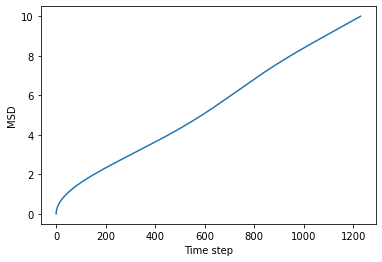

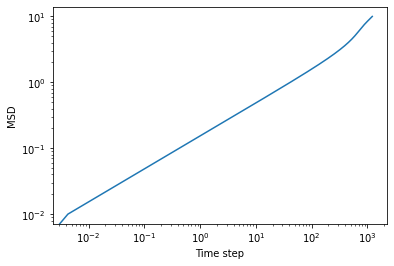

In [34]:
# MSD calculation from trajectory file
import numpy as np
import matplotlib.pyplot as plt

# Read positions from file
with open("init.xyz", "r") as f:
    lines = f.readlines()
    N = int(lines[0])
    nsteps = int(len(lines)/(N+2))
    pos = np.zeros((nsteps, N, 3))
    for i in range(nsteps):
        for j in range(N):
            pos[i,j,0] = float(lines[2+i*(N+2)+j].split()[1])
            pos[i,j,1] = float(lines[2+i*(N+2)+j].split()[2])
            pos[i,j,2] = float(lines[2+i*(N+2)+j].split()[3])

# Calculate MSD
msd = np.zeros(nsteps)
for i in range(nsteps):
    for j in range(N):
        msd[i] += np.linalg.norm(pos[i,j,:]-pos[0,j,:])**2
    msd[i] /= N

# Plot MSD
plt.plot(msd,dt*np.arange(nsteps))
plt.xlabel("Time step")
plt.ylabel("MSD")
plt.show()


# Plot MSD in log-log scale
plt.loglog(msd,dt*np.arange(nsteps))
plt.xlabel("Time step")
plt.ylabel("MSD")
plt.show()



In [89]:
# Write functions for the above code

import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 100 # number of monomers
L = 10 # distance between monomers
k = 6 # spring constant
eps=0.5 # drag coefficient
dt=0.01 # time step
nsteps=1000 # number of steps
T= 300
m=124

def generate_positions(n, distance):
      
      positions = np.zeros((n, 3))  # Initialize positions array with zeros.
      positions[0] = [0, 0, 0]  # Set the first atom at the origin.
  
      # Generate positions of the remaining atoms.
      for i in range(1, n):
          # Generate a random unit vector with equiprobable directions.
          u = np.random.uniform(-1, 1, size=3)
          unit_vector = u / np.linalg.norm(u)
  
          # Calculate the position of the atom.
          position = positions[i-1] + distance * unit_vector
          positions[i] = position
  
      return positions

def generate_forces(n):
      forces = np.zeros((n, 3))  # Initialize forces array with zeros.
  
      # Generate forces of the remaining atoms.
      for i in range(0, n):
          # Generate a random unit vector with equiprobable directions.
          u = np.random.uniform(0, 2, size=3)
          unit_vector = u / np.linalg.norm(u)
          forces[i] = unit_vector
  
      return forces

def update_positions(pos, mode="a"):
    if mode == "w":
        with open("init.xyz", "w") as f:
            f.write(str(N) + "\n")
            f.write("Rouse model\n")
            for i in range(N):
                f.write("RM\t" + str(pos[i,0]) + "\t" + str(pos[i,1]) + "\t" + str(pos[i,2]) + "\n")
    elif mode == "a":
      with open("init.xyz", "a") as f:
        f.write(str(N) + "\n")
        f.write("Rouse model\n")
        for i in range(N):
            f.write("RM\t" + str(pos[i,0]) + "\t" + str(pos[i,1]) + "\t" + str(pos[i,2]) + "\n")


def acceleration(pos, v, force, eps,k):
    a = np.zeros((N, 3))
    force = generate_forces(N)
    for i in range(N):
        for j in range(3):
            if i == 0:
              a[i,j] = (force[i,j]-k*(pos[i,j]-L)+k*(pos[i+1,j]-pos[i,j]-L)-eps*v[i,j])/m
            elif i == N-1:
              a[i,j] = (force[i,j]-k*(pos[i,j]-pos[i-1,j]-L)+k*(-pos[i,j]-L)-eps*v[i,j])/m
            else:
              a[i,j] = (force[i,j]-k*(pos[i,j]-pos[i-1,j]-L)+k*(pos[i+1,j]-pos[i,j]-L)-eps*v[i,j])/m
    return a

def velocity_verlet(r, v,force,eps, dt,k):
    # compute the acceleration
    a = acceleration(r,v,force,eps,k)
    # update the velocity
    v += 0.5*a*dt
    # update the position
    r += v*dt
    # compute the acceleration at the new position
    a_new = acceleration(r,v,force,eps,k)
    # update the velocity
    v += 0.5*a_new*dt
    return r, v

def MSD(nsteps,dt,plot=False):
    # Read positions from file
    with open("init.xyz", "r") as f:
        lines = f.readlines()
        N = int(lines[0])
        nsteps = int(len(lines)/(N+2))
        pos = np.zeros((nsteps, N, 3))
        for i in range(nsteps):
            for j in range(N):
                pos[i,j,0] = float(lines[2+i*(N+2)+j].split()[1])
                pos[i,j,1] = float(lines[2+i*(N+2)+j].split()[2])
                pos[i,j,2] = float(lines[2+i*(N+2)+j].split()[3])

    # Calculate MSD
    msd = np.zeros(nsteps)
    for i in range(nsteps):
        for j in range(N):
            msd[i] += np.linalg.norm(pos[i,j,:]-pos[0,j,:])**2
        msd[i] /= N

    # Plot MSD
    if plot:
        plt.plot(msd,dt*np.arange(nsteps))
        plt.xlabel("Time step")
        plt.ylabel("MSD")
        plt.show()

        plt.loglog(msd,dt*np.arange(nsteps))
        plt.xlabel("Time step")
        plt.ylabel("MSD")
        plt.show()
    
    return msd

def main(N, L, k, eps, dt, nsteps, T, m):
    # Generate initial positions
    pos = generate_positions(N, L)
    # Generate initial forces
    force = generate_forces(N)
    # Generate initial velocities
    v = np.random.normal(0.0, np.sqrt(k*T/m), (N,3))
    # Write initial positions to file
    update_positions(pos, mode="w")
    # Velocity Verlet algorithm
    for i in range(nsteps):
        pos, v = velocity_verlet(pos, v, force,eps, dt,k)
        update_positions(pos)
    # MSD calculation from trajectory file
    return MSD(nsteps,dt)


ValueError: x and y must have same first dimension, but have shapes (1001,) and (1000,)

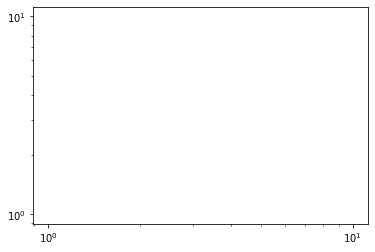

In [92]:
N=100 # number of monomers
L=10 # distance between monomers
k=6 # spring constant

dt=0.01 # time step
nsteps=1000 # number of steps
T=300 # temperature
m=124 # mass of monomer

# make eps a list of values
eps = np.linspace(1, 10, 10)

# make a list of MSDs
msd = []

# loop over eps values
for i in range(len(eps)):
    msd.append(main(N, L, k, eps[i], dt, nsteps, T, m))

# plot MSDs
for i in range(len(eps)):
    plt.loglog(msd[i],dt*np.arange(nsteps),label="eps = "+str(eps[i]))
    plt.xlabel("Time step")
    plt.ylabel("MSD")
    plt.legend()
    plt.show()

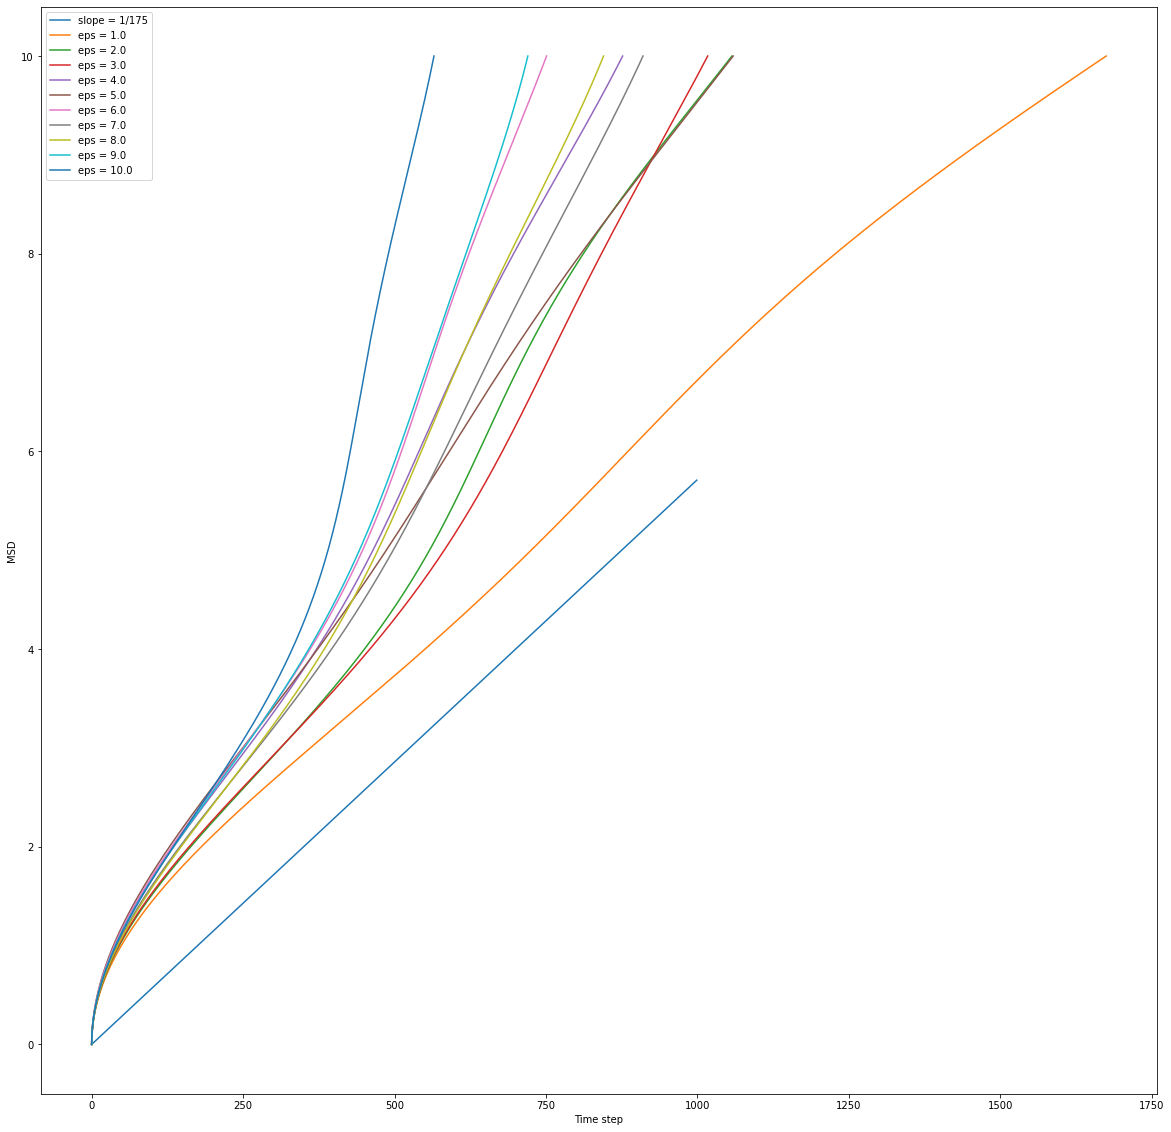

In [103]:
# plot MSDs in the same plot
# round off
plt.figure(figsize=(20,20))
for i in range(len(eps)):
    plt.plot(msd[i],dt*np.arange(nsteps+1),label="eps = "+str(eps[i]))
    plt.xlabel("Time step")
    plt.ylabel("MSD")
    plt.legend()
  